In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, confusion_matrix, f1_score

plt.rcParams['figure.figsize'] = (12,6)

# Class imbalance

- What is it?
- Why might we care about it?
- How can we deal with it?


## What is it?

In [2]:
# Import a creditcard dataset
df = pd.read_csv('creditcardfraud.zip', index_col=0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# check for null values
df.isna().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [4]:
# inspect the class sizes
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [7]:
# calculate the percentage of observations belonging to class 1
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

## Why is it a Problem

- Because the classifier has an "incentive" to rather predict class 0. It just shows up so much more.

## How can we deal with it?

In [13]:
# Create a function that prints scores and a confusion matrix for a specified model
def print_evaluations(ytrue, ypred, model):
    '''
    Prints the confusion matrix and some evaluation metrics for 
    a specified model.
    '''
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #print confusion matrix
    fig = plt.figure(figsize=(12, 12))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='.0f', ax= ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['non-fraud', 'fraud'])
    ax.yaxis.set_ticklabels(['non-fraud', 'fraud'])

#### Split the data

In [9]:
X = df.iloc[:,:-1]
y = df.Class

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213605, 29), (71202, 29), (213605,), (71202,))

#### Build a simple baseline model

In [11]:
ypred_bl = [0] * X.shape[0]

How does model Baseline score:
The accuracy of the model is: 0.998
The precision of the model is: 0.0
The recall of the model is: 0.0
The f1-score of the model is: 0.0
[[284315      0]
 [   492      0]]


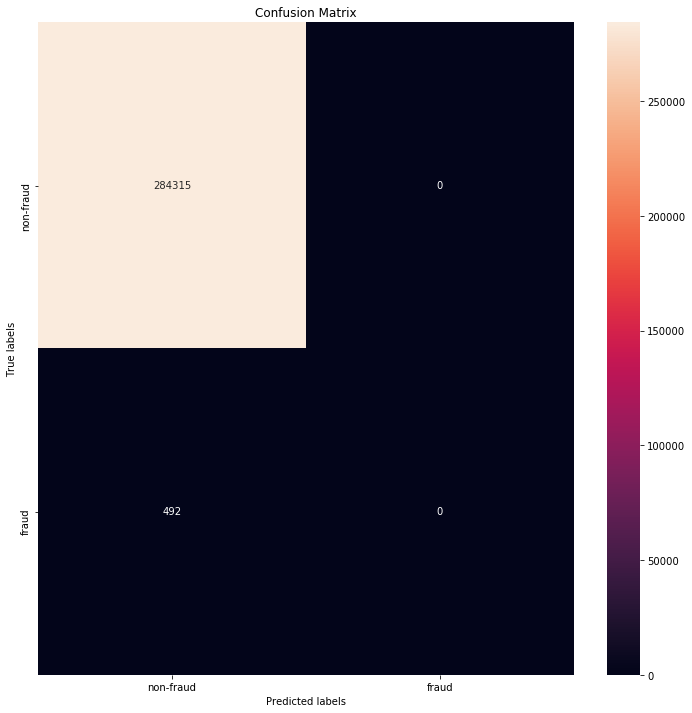

In [14]:
print_evaluations(y, ypred_bl, 'Baseline')

#### Compare it to a random forest classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, max_depth=3
                            , random_state=10)

In [16]:
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [17]:
# Make predictions on the test data
ypred_rf = rf.predict(X_test)

How does model RandomForest score:
The accuracy of the model is: 0.999
The precision of the model is: 0.884
The recall of the model is: 0.628
The f1-score of the model is: 0.734
[[71071    10]
 [   45    76]]


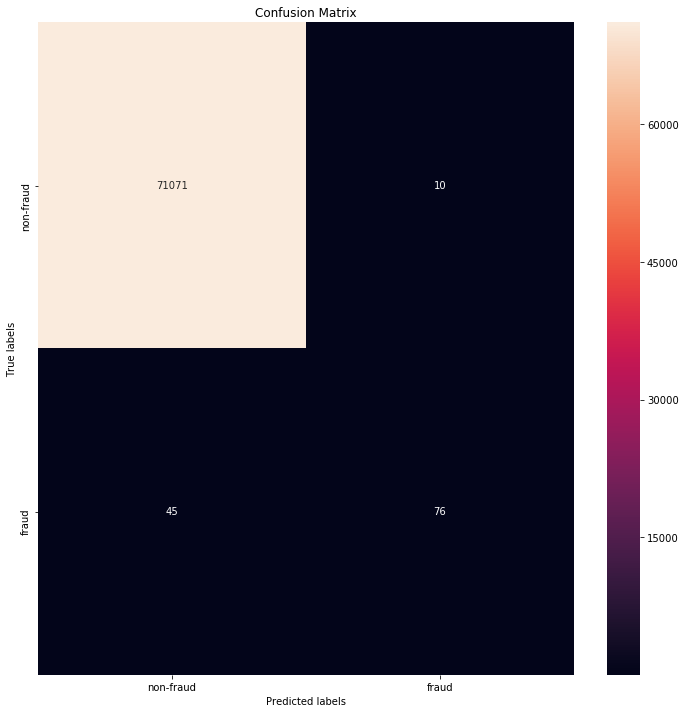

In [18]:
# Inspect the evaluators
print_evaluations(y_test, ypred_rf, 'RandomForest')

### Use Undersampling

In [ ]:
#!pip install imbalanced-learn

In [19]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 

In [20]:
# Instantiate both resamplers
rus = RandomUnderSampler(random_state=10, sampling_strategy={0: 20000})
nm = NearMiss(random_state=10, sampling_strategy={0: 20000})

In [21]:
# Resample according to both resamplers
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_nm, y_nm = nm.fit_resample(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureW

In [22]:
X_rus.shape, y_rus.shape

((20371, 29), (20371,))

How does model RandomUndersampling score:
The accuracy of the model is: 0.999
The precision of the model is: 0.876
The recall of the model is: 0.818
The f1-score of the model is: 0.846
[[71067    14]
 [   22    99]]


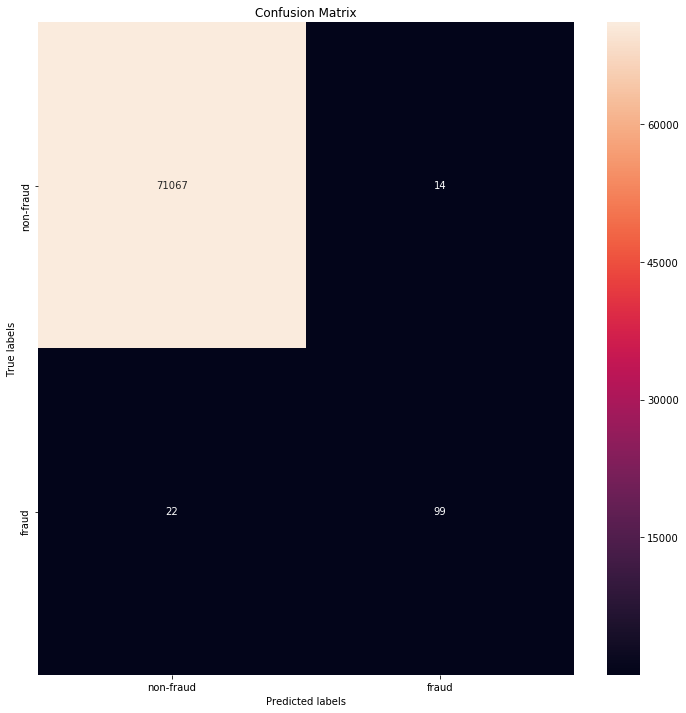

In [23]:
# Fit the random undersampling model, 
# make predictions and inspect evaluations
rf.fit(X_rus, y_rus)
ypred_rus = rf.predict(X_test)
print_evaluations(y_test, ypred_rus, 'RandomUndersampling')

How does model NearMiss score:
The accuracy of the model is: 0.952
The precision of the model is: 0.029
The recall of the model is: 0.851
The f1-score of the model is: 0.057
[[67663  3418]
 [   18   103]]


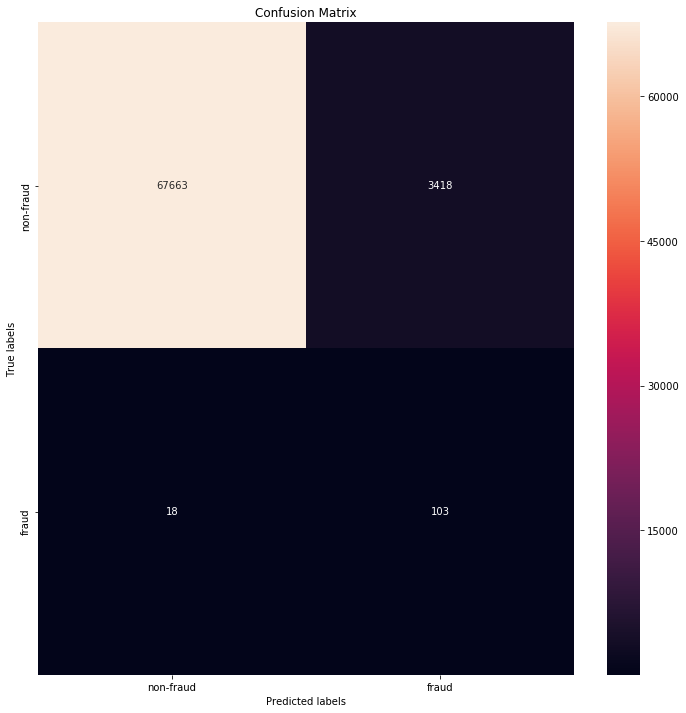

In [24]:
# Fit the Near Miss, 
# make predictions and inspect evaluations
rf.fit(X_nm, y_nm)
ypred_nm = rf.predict(X_test)
print_evaluations(y_test, ypred_nm, 'NearMiss')

### Use Oversampling

In [25]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [26]:
# RandomOverSampler Model
ros = RandomOverSampler(random_state=10, sampling_strategy={1: 2000})

In [27]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [28]:
np.unique(y_ros, return_counts=True)

(array([0, 1]), array([213234,   2000]))

How does model RandomOversampling score:
The accuracy of the model is: 0.999
The precision of the model is: 0.892
The recall of the model is: 0.752
The f1-score of the model is: 0.816
[[71070    11]
 [   30    91]]


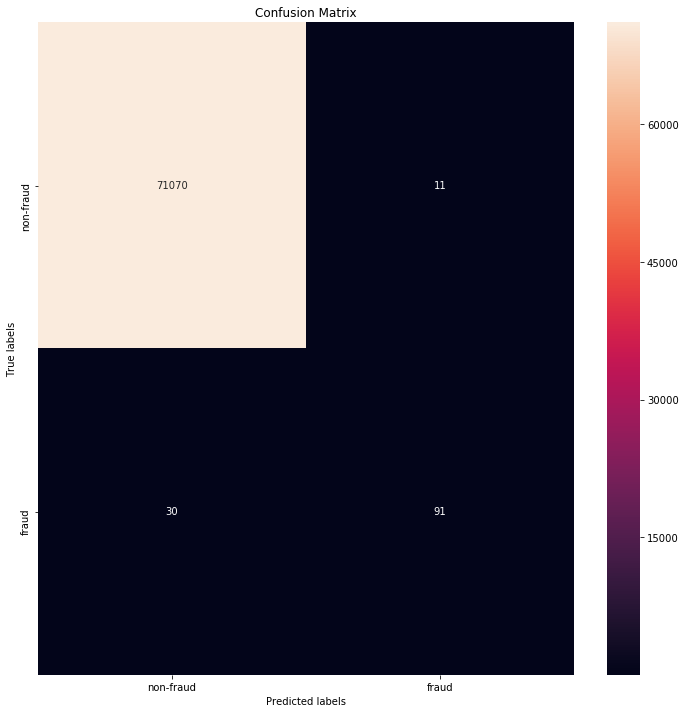

In [29]:
# Fit the RandomOverSampling, 
# make predictions and inspect evaluations
rf.fit(X_ros, y_ros)
ypred_ros = rf.predict(X_test)
print_evaluations(y_test, ypred_ros, 'RandomOversampling')

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


How does model SMOTE score:
The accuracy of the model is: 0.999
The precision of the model is: 0.889
The recall of the model is: 0.793
The f1-score of the model is: 0.838
[[71069    12]
 [   25    96]]


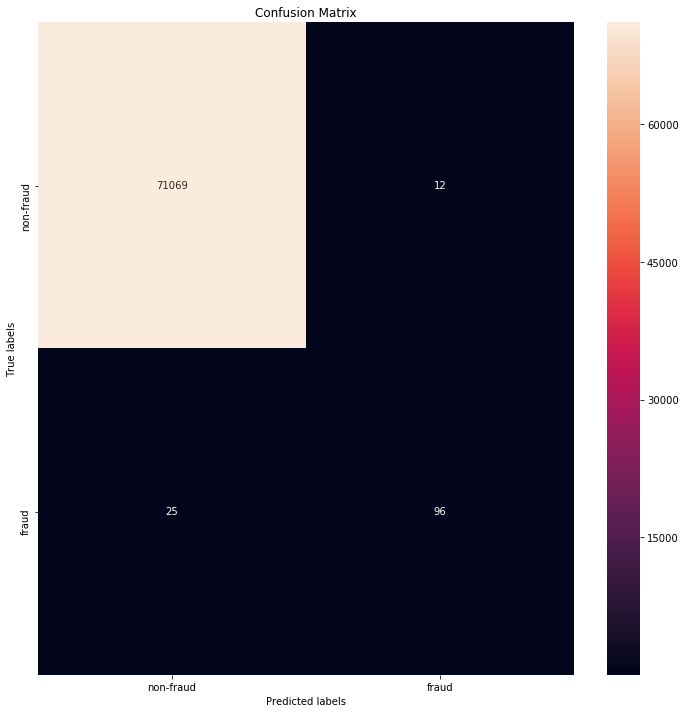

In [30]:
# Fit and run SMOTE
sm = SMOTE(sampling_strategy={1: 2000})
X_sm, y_sm = sm.fit_resample(X_train, y_train)

rf.fit(X_sm, y_sm)
ypred_sm = rf.predict(X_test)
print_evaluations(y_test, ypred_sm, 'SMOTE')